# About the dataset

This dataset was parsed from the following midi files:

* [Rachmaninoff Moment Musicaux, Op. 16 No. 4](https://musescore.com/user/33306646/scores/6058350)
* [Rachmaninoff Elegie, Op. 3 No. 1](https://musescore.com/user/2660886/scores/2008481)
* [Rachmaninoff Prelude, Op. 3 No. 2](https://musescore.com/user/2660886/scores/2101171)
* [Bach 846 Prelude](https://musescore.com/user/37468058/scores/7108913)
* [Bach 847 Prelude](https://musescore.com/classicman/scores/227966)
* [Chopin Nocturne Op. 9 No. 1](https://musescore.com/user/33306646/scores/6306868)
* [Chopin Nocturne Op. 9 No. 2](https://musescore.com/user/28966982/scores/5178145)
* [Chopin Nocturne Op. 48 No. 1](https://musescore.com/user/33306646/scores/6224476)
* [Chopin Nocturne Op. 55 No. 1](https://musescore.com/user/34104354/scores/6285565)
* [Chopin Torrent Etude Op. 10 No. 4](https://musescore.com/j_y_kim/scores/5497268)
* [Chopin Revolutionary Etude Op. 10 No. 12](https://musescore.com/user/33306646/scores/5807005)
* [Chopin Wrong Note Etude Op. 25 No. 5](https://musescore.com/user/33306646/scores/5801576)
* [Chopin Ocean Etude Op. 25 No. 12](https://musescore.com/user/33306646/scores/5980955)
* [Liszt Liebestraum III, Op. 541 No. 3](https://musescore.com/user/19710/scores/65159)
* [Liszt Grandes Etudes de Paganini - La campanella - S. 141 No. 3](https://musescore.com/user/15293341/scores/4426976)
* [Liszt Études d’exécution transcendante - Wilde Jagd - S. 139 No. 8](https://musescore.com/user/2749876/scores/2603331)
* [Liszt Études d’exécution transcendante - Chasse Neige - S. 139 No. 12](https://musescore.com/user/33306646/scores/6504649)
* [Liszt Consolation No. 3](https://musescore.com/user/33306646/scores/6215465)

The Dataset can be downloaded [here](https://drive.google.com/drive/folders/1xsFBW0ophcb5iB42Vd8BUzVHFOxiuSeJ?usp=sharing)

The parser requires the following packages:

* mido
* pandas

To save you some time, here is the command to run to parse all files in one command:

```
python3.9 converter.py Rachmaninoff_16_4.mid Rachmaninoff_3_2.mid Liszt_541_3.mid Rachmaninoff_3_1.mid Liszt_139_12.mid Liszt_141_3.mid Liszt_Consolation_3.mid Liszt_139_8.mid Chopin_48_1.mid Chopin_55_1.mid Chopin_25_5.mid Chopin_25_12.mid Chopin_10_4.mid Chopin_10_12.mid Bach_847_I.mid Chopin_9_1.mid Chopin_9_2.mid Bach_846_I.mid
```

The following code assumes you installed the following packages:

- pandas
- matplotlilb
- seaborn

# Imports

In [331]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot

# Function space

In [332]:
def calculate_duration(row, df):
    if row.velocity == 0:
        return 0
    else:
        return (df.loc[(df['note'] == row.note) & (df['velocity'] == 0) & (df['time'] > row.time)].iloc[0]['time'] - row.time)

In [333]:
def frame_transformer(df):
    """
    This is a helper function to execute all data transformations in the beginning
    """
    df['duration'] = df.apply(lambda x: calculate_duration(x, df), axis=1)
    df = df[df['velocity'] != 0]
    return df

In [334]:
def load_dataset(filename: str):
    """
    As it would be very lengthy to import 36 files like this I decided to create a helper function
    """
    note = pd.read_csv(f"output/{filename}/{filename}_note.csv", usecols=['track', 'time', 'note', 'velocity'])
    meta = pd.read_csv(f"output/{filename}/{filename}_meta.csv")
    note = frame_transformer(note)
    return note, meta

# Loading the Dataset

The following code block assumes that all of your CSV files are stored in the directory `output`, and in a directory with their filename, as the parser does that. If that is not the case, please adjust the helper function or put all CSV files in a folder structure as such:

```
output/
├─ Bach_846_I/
│  ├─ Bach_846_I_meta.csv
│  ├─ Bach_846_I_note.csv
├─ Bach_847_I/
│  ├─ Bach_847_I_meta.csv
│  ├─ Bach_847_I_note.csv
```

The naming convention is as follows:
First letter of composer
N for Note
M for Meta
Numbers smushed

so Bach_846_I turns into

BN846, BM846

Liszt's Consolidation 3 turns into
LN3

In [335]:
BN846, BM846 = load_dataset('Bach_846_I')
BN847, BM847 = load_dataset('Bach_847_I')

RN31, RM31 = load_dataset('Rachmaninoff_3_1')
RN32, RM32 = load_dataset('Rachmaninoff_3_2')
RN164, RM164 = load_dataset('Rachmaninoff_16_4')

LN1398, LM1398 = load_dataset('Liszt_139_8')
LN13912, LM13912 = load_dataset('Liszt_139_12')
LN1413, LM1413 = load_dataset('Liszt_141_3')
LN5413, LM5413 = load_dataset('Liszt_541_3')
LN3, LM3 = load_dataset('Liszt_Consolation_3')


CN91, CM91 = load_dataset('Chopin_9_1')
CN92, CM92 = load_dataset('Chopin_9_2')
CN481, CM481 = load_dataset('Chopin_48_1')
CN551, CM551 = load_dataset('Chopin_55_1')

CN104, CM104 = load_dataset('Chopin_10_4')
CN1012, CM1012 = load_dataset('Chopin_10_12')
CN255, CM255 = load_dataset('Chopin_25_5')
CN2512, CM2512 = load_dataset('Chopin_25_12')

# Analyzing Quality

<Axes: xlabel='time', ylabel='note'>

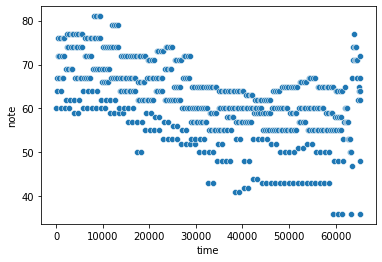

In [336]:
sns.scatterplot(data=BN846, x='time', y='note')